# Violent Crime Dataset Exploration

### Dependencies

In [2]:
import pandas as pd

### Read in CSV and create DataFrame

In [3]:
filepath = "Output/cleaned_crime_by_jurisdiction.csv"
csv = pd.read_csv(filepath)
df = pd.DataFrame(csv)

### View head

In [4]:
df.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,state
0,1990,NM00101,"Albuquerque, NM",384736.0,5121.0,34.0,222.0,3835.0,1030.0,1331.04,8.84,57.70,996.79,267.72,NM
1,1990,TX22001,"Arlington, TX",261721.0,1876.0,8.0,139.0,1143.0,586.0,716.79,3.06,53.11,436.72,223.90,TX
2,1990,GAAPD00,"Atlanta, GA",394017.0,16097.0,231.0,695.0,9062.0,6109.0,4085.36,58.63,176.39,2299.90,1550.44,GA
3,1990,CO00101,"Aurora, CO",222103.0,3191.0,8.0,170.0,2616.0,397.0,1436.72,3.60,76.54,1177.83,178.75,CO
4,1990,TX22701,"Austin, TX",465622.0,3326.0,46.0,280.0,1539.0,1461.0,714.31,9.88,60.13,330.53,313.77,TX


### Determine jurisdictions with highest mean crimes_percapita over all years

In [5]:
df.groupby('agency_jurisdiction').crimes_percapita.mean().sort_values(ascending=False)

agency_jurisdiction
St. Louis, MO                 2463.630000
Atlanta, GA                   2382.787308
Detroit, MI                   2263.590385
Miami, FL                     2196.326923
Baltimore, MD                 2086.754615
Newark, NJ                    1922.306538
Tampa, FL                     1883.245769
Oakland, CA                   1823.308077
Chicago, IL                   1765.390769
Washington, DC                1747.042692
Kansas City, MO               1744.826154
Orlando, FL                   1729.573846
Memphis, TN                   1678.066923
Nashville, TN                 1485.658462
Cleveland, OH                 1456.494000
Buffalo, NY                   1431.170000
Minneapolis, MN               1371.485385
Boston, MA                    1331.079615
Philadelphia, PA              1327.703462
Dallas, TX                    1306.570000
New Orleans, LA               1301.461154
Los Angeles, CA               1274.272692
Charlotte, NC                 1268.121923
Indianapolis, 

### City search for above grouped dataframe

In [6]:
search_term = "Jacksonville"
ranked = pd.DataFrame(df.groupby('agency_jurisdiction').crimes_percapita.mean().sort_values(ascending=False).reset_index())
for index, row in ranked.iterrows():
    if search_term in row['agency_jurisdiction']:
        print(row)

agency_jurisdiction    Jacksonville, FL
crimes_percapita                1071.32
Name: 32, dtype: object


In [137]:
### Plotting and stats analysis

In [7]:
df.head()

,report_year,agency_code,agency_jurisdiction,population,violent_crimes,homicides,rapes,assaults,robberies,crimes_percapita,homicides_percapita,rapes_percapita,assaults_percapita,robberies_percapita,state
0,1990,NM00101,"Albuquerque, NM",384736.0,5121.0,34.0,222.0,3835.0,1030.0,1331.04,8.84,57.70,996.79,267.72,NM
1,1990,TX22001,"Arlington, TX",261721.0,1876.0,8.0,139.0,1143.0,586.0,716.79,3.06,53.11,436.72,223.90,TX
2,1990,GAAPD00,"Atlanta, GA",394017.0,16097.0,231.0,695.0,9062.0,6109.0,4085.36,58.63,176.39,2299.90,1550.44,GA
3,1990,CO00101,"Aurora, CO",222103.0,3191.0,8.0,170.0,2616.0,397.0,1436.72,3.60,76.54,1177.83,178.75,CO
4,1990,TX22701,"Austin, TX",465622.0,3326.0,46.0,280.0,1539.0,1461.0,714.31,9.88,60.13,330.53,313.77,TX


In [132]:
# building a simple dictionary with key and value.
# Created a function to generate year
# Created a function to populate the crime dictionary with the key, value pair
crime_per_year = {}
year_list = []

In [144]:
def build_year_list(num_year):
    start_year = 1990
    for i in range(0, num_year-1):
        year_list.append(start_year+i)
    return year_list

In [145]:
build_year_list(26)

[1990,
 1991,
 1992,
 1993,
 1994,
 1995,
 1996,
 1997,
 1998,
 1999,
 2000,
 2001,
 2002,
 2003,
 2004,
 2005,
 2006,
 2007,
 2008,
 2009,
 2010,
 2011,
 2012,
 2013,
 2014]

In [78]:
def violent_crime_count(year_list):
    for i in range(len(year_list)):
        crime_count = df[df['report_year'] == year_list[i]]['violent_crimes'].sum()
        crime_per_year.update({year_list[i]: crime_count})
    return crime_per_year

In [79]:
violent_crime_count(year_list)

{1990: 865969.0,
 1991: 900316.0,
 1992: 882124.0,
 1993: 866963.0,
 1994: 817446.0,
 1995: 766751.0,
 1996: 715249.0,
 1997: 667270.0,
 1998: 619280.0,
 1999: 579433.0,
 2000: 574377.0,
 2001: 574528.0,
 2002: 561665.0,
 2003: 533396.0,
 2004: 513157.0,
 2005: 516126.0,
 2006: 522223.0,
 2007: 511135.0,
 2008: 497761.0,
 2009: 463986.0,
 2010: 438261.0,
 2011: 423978.0,
 2012: 431738.0,
 2013: 422507.0,
 2014: 421311.0}

In [104]:
crime_per_year

{1990: 865969.0,
 1991: 900316.0,
 1992: 882124.0,
 1993: 866963.0,
 1994: 817446.0,
 1995: 766751.0,
 1996: 715249.0,
 1997: 667270.0,
 1998: 619280.0,
 1999: 579433.0,
 2000: 574377.0,
 2001: 574528.0,
 2002: 561665.0,
 2003: 533396.0,
 2004: 513157.0,
 2005: 516126.0,
 2006: 522223.0,
 2007: 511135.0,
 2008: 497761.0,
 2009: 463986.0,
 2010: 438261.0,
 2011: 423978.0,
 2012: 431738.0,
 2013: 422507.0,
 2014: 421311.0}

In [140]:
homocides_per_year = {}

In [141]:
def homocide_count(year_list):
    for i in range(len(year_list)):
        homocide_count = df[df['report_year'] == year_list[i]]['homicides'].sum()
        homocides_per_year.update({year_list[i]: homocide_count})
    return homocides_per_year

In [147]:
homocide_count(year_list)

{1990: 11866.0,
 1991: 12288.0,
 1992: 11729.0,
 1993: 11919.0,
 1994: 10816.0,
 1995: 10041.0,
 1996: 8941.0,
 1997: 7954.0,
 1998: 7113.0,
 1999: 6822.0,
 2000: 6774.0,
 2001: 7128.0,
 2002: 7130.0,
 2003: 7255.0,
 2004: 6939.0,
 2005: 7103.0,
 2006: 7384.0,
 2007: 7051.0,
 2008: 6715.0,
 2009: 5985.0,
 2010: 5867.0,
 2011: 5702.0,
 2012: 5848.0,
 2013: 5344.0,
 2014: 5349.0}

In [149]:
homocides_per_year

{1990: 11866.0,
 1991: 12288.0,
 1992: 11729.0,
 1993: 11919.0,
 1994: 10816.0,
 1995: 10041.0,
 1996: 8941.0,
 1997: 7954.0,
 1998: 7113.0,
 1999: 6822.0,
 2000: 6774.0,
 2001: 7128.0,
 2002: 7130.0,
 2003: 7255.0,
 2004: 6939.0,
 2005: 7103.0,
 2006: 7384.0,
 2007: 7051.0,
 2008: 6715.0,
 2009: 5985.0,
 2010: 5867.0,
 2011: 5702.0,
 2012: 5848.0,
 2013: 5344.0,
 2014: 5349.0}

In [199]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [89]:
fatalities_per_year = {1990: 2,
 1991: 12,
 1992: 14,
 1993: 37,
 1994: 23,
 1995: 15,
 1996: 24,
 1997: 17,
 1998: 28,
 1999: 22,
 2000: 14,
 2001: 10,
 2002: 15,
 2003: 10,
 2004: 9,
 2005: 14,
 2006: 25,
 2007: 39,
 2008: 24,
 2009: 14,
 2010: 14,
 2011: 8,
 2012: 44,
 2013: 24,
 2014: 17}

In [150]:
lists2 = homocides_per_year.items()
x2, y2 = zip(*lists2)

In [188]:
lists3 = fatalities_per_year.items()
x3, y3 = zip(*lists3)

In [189]:
y3_adj = []

In [190]:
for i in range(len(y3)):
    y3_adj.append(y3[i]*100)

In [191]:
y3_adj

[200,
 1200,
 1400,
 3700,
 2300,
 1500,
 2400,
 1700,
 2800,
 2200,
 1400,
 1000,
 1500,
 1000,
 900,
 1400,
 2500,
 3900,
 2400,
 1400,
 1400,
 800,
 4400,
 2400,
 1700]

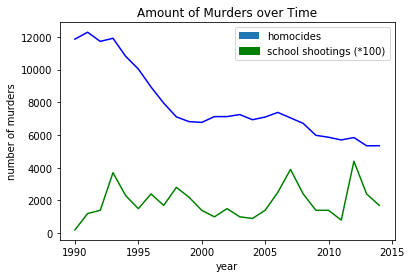

In [210]:
plt.plot(x2,y2, color='blue')
plt.plot(x3,y3_adj, color='green')
blue_patch = mpatches.Patch(label='homocides')
orange_patch = mpatches.Patch(color='green', label='school shootings (*100)')
plt.legend(handles=[blue_patch, orange_patch])
plt.xlabel('year')
plt.ylabel('number of murders')
plt.title('Amount of Murders over Time')
plt.show()

In [85]:
# Building a dictionary of tuples
lists1 = crime_per_year.items()

In [133]:
# Unpacking the list of tuples into an x, y value
x1, y1 = zip(*lists1)

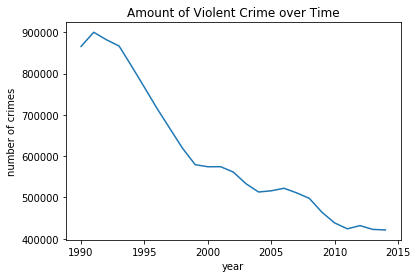

In [153]:
plt.plot(x1,y1)
plt.xlabel('year')
plt.ylabel('number of crimes')
plt.title('Amount of Violent Crime over Time')
plt.show()

In [125]:
# Building a list of the crime values only - no keys or indexes
crime_list = []
for key, value in crime_per_year.items():
    crime_list.append(value)

In [126]:
crime_list[0:5]

[865969.0, 900316.0, 882124.0, 866963.0, 817446.0]

In [127]:
# Building a list of the death values only - no keys or indexes
death_list = []
for key, value in fatalities_per_year.items():
    death_list.append(value)

In [193]:
# Building a list of the murder values only - no keys or indexes
murder_list = []
for key, value in homocides_per_year.items():
    murder_list.append(value)

In [194]:
murder_list[0:5]

[11866.0, 12288.0, 11729.0, 11919.0, 10816.0]

In [128]:
death_list[0:5]

[2, 12, 14, 37, 23]

In [129]:
# using Scipy to do some basic stats on the data that we have
import scipy
from scipy.stats import pearsonr
x = scipy.array(death_list)
y = scipy.array(crime_list)

In [130]:
r_row, p_value = pearsonr(x, y)

In [131]:
# These values suggest little to no correlation between the volume of crime and the volume of school shootings
print(r_row, p_value)

-0.106325931424 0.612961884394


In [195]:
# Studying correlation between school deaths and murders
x = scipy.array(death_list)
y = scipy.array(murder_list)

In [196]:
r_row, p_value = pearsonr(x, y)

In [197]:
# These values suggest little to no correlation between the volume of crime and the volume of school shootings
print(r_row, p_value)

-0.0984626395738 0.639606361624


In [ ]:
### Doing some database prep work

In [234]:
# Setting up the SQLite DB
import sqlalchemy
from sqlalchemy import create_engine, MetaData
from sqlalchemy.ext.declarative import declarative_base
from sqlalchemy import Column, Integer, String, Numeric, Text, Float

In [235]:
# Create an engine to a SQLite database file called `crime_data.sqlite`
engine = create_engine("sqlite:///crime_data.sqlite")

In [236]:
 # Create a connection to the engine called `conn`
conn = engine.connect()

In [237]:
# Use `declarative_base` from SQLAlchemy to model the demographics table as an ORM class
# DF columns will be used to name the columns
Base = declarative_base()

class Crime(Base):
    __tablename__ = 'crime'

    id = Column(Integer, primary_key=True)
    report_year = Column(Integer)
    agency_jurisdiction = Column(Text)
    population = Column(Integer)
    violent_crime = Column(Integer)
   
    def __repr__(self):
        return f"id={self.id}, name={self.name}"

In [238]:
 # Use `create_all` to create the customers table in the database
Base.metadata.create_all(engine)

In [239]:
# Use Orient='records' to create a list of data to write
# to_dict() cleans out DataFrame metadata as well
data = df.to_dict(orient='records')

In [247]:
data[:1]

[{'agency_code': 'NM00101',
  'agency_jurisdiction': 'Albuquerque, NM',
  'assaults': 3835.0,
  'assaults_percapita': 996.79,
  'crimes_percapita': 1331.04,
  'homicides': 34.0,
  'homicides_percapita': 8.84,
  'population': 384736.0,
  'rapes': 222.0,
  'rapes_percapita': 57.7,
  'report_year': 1990,
  'robberies': 1030.0,
  'robberies_percapita': 267.72,
  'state': 'NM',
  'violent_crimes': 5121.0}]

In [241]:
# Use MetaData from SQLAlchemy to reflect the tables
metadata = MetaData(bind=engine)
metadata.reflect()

In [242]:
# Save the reference to the `crime` table as a variable called `table`
table = sqlalchemy.Table('crime', metadata, autoload=True)

In [243]:
conn.execute(table.delete())

In [244]:
conn.execute(table.insert(), data)

In [246]:
# Test that the insert works by fetching the first 5 rows. 
conn.execute("select * from crime limit 5").fetchall()

[(1, 1990, 'Albuquerque, NM', 384736, None),
 (2, 1990, 'Arlington, TX', 261721, None),
 (3, 1990, 'Atlanta, GA', 394017, None),
 (4, 1990, 'Aurora, CO', 222103, None),
 (5, 1990, 'Austin, TX', 465622, None)]